In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,classification_report

In [4]:
df = pd.read_csv('hair_loss.csv')


In [5]:
df.head()

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
0,312,100,14,249,87,55,333,44,41,368,4
1,52,207,3,425,387,1,182,26,65,41,1
2,170,197,11,140,199,91,414,30,54,90,4
3,256,334,19,358,120,3,35,48,45,65,2
4,309,185,58,207,329,301,345,23,90,346,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   total_protein       100000 non-null  int64
 1   total_keratine      100000 non-null  int64
 2   hair_texture        100000 non-null  int64
 3   vitamin             100000 non-null  int64
 4   manganese           100000 non-null  int64
 5   iron                100000 non-null  int64
 6   calcium             100000 non-null  int64
 7   body_water_content  100000 non-null  int64
 8   stress_level        100000 non-null  int64
 9   liver_data          100000 non-null  int64
 10  hair_fall           100000 non-null  int64
dtypes: int64(11)
memory usage: 8.4 MB


In [7]:
df.shape

(100000, 11)

In [8]:
df.describe()

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,249.573960,248.875470,49.558400,249.949730,249.558480,249.099260,250.538160,49.484590,49.366180,249.769930,2.501520
std,144.427199,144.193226,28.913959,144.240639,144.283595,144.341273,144.467648,28.863998,28.928164,144.639119,1.710604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,124.000000,25.000000,125.000000,125.000000,124.000000,125.000000,24.000000,24.000000,124.000000,1.000000
50%,250.000000,249.000000,50.000000,250.000000,250.000000,249.000000,251.000000,50.000000,49.000000,250.000000,2.000000
75%,375.000000,373.000000,75.000000,375.000000,375.000000,374.000000,376.000000,74.000000,75.000000,376.000000,4.000000
max,499.000000,499.000000,99.000000,499.000000,499.000000,499.000000,499.000000,99.000000,99.000000,499.000000,5.000000


In [9]:
df.isnull().sum()

total_protein         0
total_keratine        0
hair_texture          0
vitamin               0
manganese             0
iron                  0
calcium               0
body_water_content    0
stress_level          0
liver_data            0
hair_fall             0
dtype: int64

In [10]:
# no null values present

Text(0.5, 1.0, 'Correlation Heatmap')

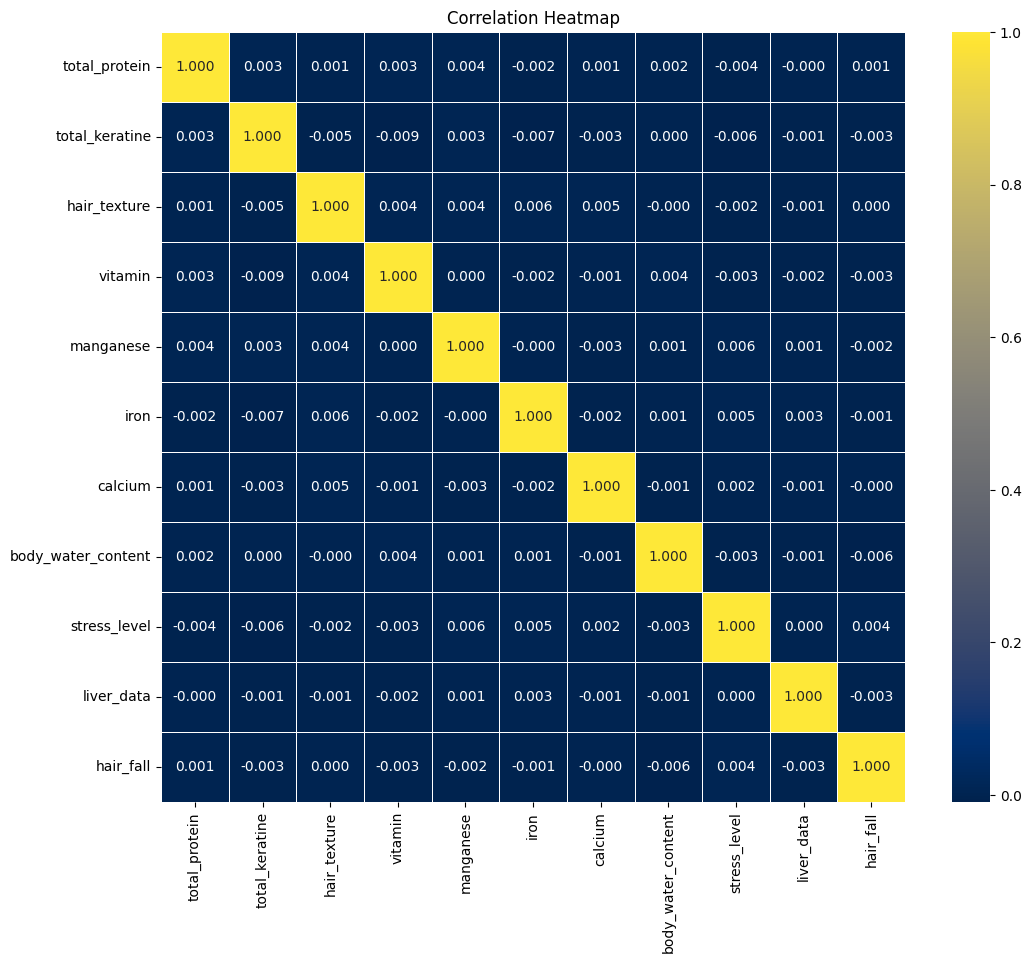

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=.5,cmap='cividis',fmt='.3f')# viridis,coolwarm,magma
plt.title('Correlation Heatmap')

In [12]:
#dividing dependet and independent features

In [13]:
x=df.drop('hair_fall',axis=1)

In [14]:
x

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data
0,312,100,14,249,87,55,333,44,41,368
1,52,207,3,425,387,1,182,26,65,41
2,170,197,11,140,199,91,414,30,54,90
3,256,334,19,358,120,3,35,48,45,65
4,309,185,58,207,329,301,345,23,90,346
...,...,...,...,...,...,...,...,...,...,...
99995,440,20,63,209,473,260,12,86,7,281
99996,311,233,37,352,194,159,391,57,76,30
99997,27,210,10,185,376,278,96,40,49,110
99998,450,18,35,250,287,157,81,31,2,156


In [15]:
y = df['hair_fall'] 

In [16]:
y

0        4
1        1
2        4
3        2
4        4
        ..
99995    5
99996    5
99997    3
99998    1
99999    0
Name: hair_fall, Length: 100000, dtype: int64

In [17]:
df

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
0,312,100,14,249,87,55,333,44,41,368,4
1,52,207,3,425,387,1,182,26,65,41,1
2,170,197,11,140,199,91,414,30,54,90,4
3,256,334,19,358,120,3,35,48,45,65,2
4,309,185,58,207,329,301,345,23,90,346,4
...,...,...,...,...,...,...,...,...,...,...,...
99995,440,20,63,209,473,260,12,86,7,281,5
99996,311,233,37,352,194,159,391,57,76,30,5
99997,27,210,10,185,376,278,96,40,49,110,3
99998,450,18,35,250,287,157,81,31,2,156,1


## Train test split done

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [19]:
x_train.shape

(70000, 10)

In [31]:
x_test.shape

(30000, 10)

In [32]:
scaler=StandardScaler()
scaler_train_data=scaler.fit_transform(x_train)
scaler_test_data=scaler.fit_transform(x_test)

## pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer   # Handle missing values nije theke e dkehe nay
from sklearn.preprocessing import StandardScaler # feature Scalling 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [34]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()


In [35]:
numerical_columns

['total_protein',
 'total_keratine',
 'hair_texture',
 'vitamin',
 'manganese',
 'iron',
 'calcium',
 'body_water_content',
 'stress_level',
 'liver_data',
 'hair_fall']

In [70]:
numerical_columns = [
    'total_protein',
    'total_keratine',
    'hair_texture',
    'vitamin',
    'manganese',
    'iron',
    'calcium',
    'body_water_content',
    'stress_level',
    'liver_data'
]

In [37]:
# Numerical pipeline
numerical_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
        ('scaler', StandardScaler())  # Feature scaling
    ]
)

In [38]:
# Column Transformer for numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns)
    ]
)


# model training

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import accuracy_score,r2_score,precision_score


In [49]:
models={
    'Random forest':RandomForestClassifier(),
    'Logistic regression':LogisticRegression(),
    'Decision TreeDekh Classifier':DecisionTreeClassifier(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'NaiveBayes': GaussianNB() 
}

In [50]:
def evaluate_model(X_train,y_train,X_test,y_test,models):

    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)



        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get accuracy for test data prediction

        test_model_score1 = accuracy_score(y_test,y_test_pred)
        
         # Get R2 for test data prediction

        test_model_score2 = r2_score(y_test,y_test_pred)
        
         # Get precision for test data prediction
        test_model_score3 = precision_score(y_test, y_test_pred, average='weighted')

        report[list(models.keys())[i]] =  (test_model_score1,test_model_score2,test_model_score3)
        
#         accuracy = accuracy_score(y_test, y_test_pred)
#         classification_report_result = classification_report(y_test, y_pred)

        # Print the results
#         print(f"Accuracy: {accuracy}")
#         print("Classification Report:")
#         print(classification_report_result)


    return report

In [57]:
model_report=evaluate_model(scaler_train_data,y_train,scaler_test_data,y_test,models)


In [60]:
classifier=DecisionTreeClassifier()
best_model_score=max(sorted(model_report.values()))


In [61]:
best_model_score

(0.16796666666666665, -1.0074927818357513, 0.16809027962365355)

In [62]:
naive_bayes = GaussianNB()
naive_bayes.fit(scaler_train_data, y_train)

GaussianNB()

In [63]:
y_pred = naive_bayes.predict(scaler_test_data)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.1661
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.10      0.12      5036
           1       0.15      0.06      0.09      5024
           2       0.17      0.28      0.21      4926
           3       0.16      0.13      0.14      4993
           4       0.17      0.09      0.12      5012
           5       0.17      0.34      0.23      5009

    accuracy                           0.17     30000
   macro avg       0.16      0.17      0.15     30000
weighted avg       0.16      0.17      0.15     30000



In [65]:
## Hypeparameter Tuning
params={'max_depth':[3,5,10,None],
              'n_estimators':[100,200,300],
               'criterion':['gini','entropy']
              }

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define your classifier
classifier = DecisionTreeClassifier()

# Define the hyperparameter grid
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Assuming x_train and y_train are defined
cv = RandomizedSearchCV(classifier, param_distributions=params, scoring='accuracy', cv=5, verbose=3)
cv.fit(x_train, y_train)
best_params = cv.best_params_

print("Best hyperparameters:", best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.165 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.162 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.162 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.173 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.169 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.165 total time=   0.2s
[CV 2/5] END criterion

C:\Users\ARKA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ARKA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ARKA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\ARKA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", lin

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define your classifier
classifier = DecisionTreeClassifier()

# Define the hyperparameter grid
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],  # Add 'None' as an option
}

# Assuming x_train and y_train are defined
cv = RandomizedSearchCV(classifier, param_distributions=params, scoring='accuracy', cv=5, verbose=3)
cv.fit(x_train, y_train)
best_params = cv.best_params_

print("Best hyperparameters:", best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.164 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.167 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.172 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.169 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.169 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.170 total time=   0.0s
[CV 2/5] END criterion=entropy, m

C:\Users\ARKA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ARKA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ARKA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\ARKA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", l

Best hyperparameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define your classifier
classifier = DecisionTreeClassifier()

# Define the hyperparameter grid
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': list(range(1, len(numerical_columns))),  # Provide a range of integer values
}

# Assuming x_train and y_train are defined
cv = RandomizedSearchCV(classifier, param_distributions=params, scoring='accuracy', cv=5, verbose=3)
cv.fit(x_train, y_train)
best_params = cv.best_params_

print("Best hyperparameters:", best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.164 total time=   1.6s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.166 total time=   1.8s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.161 total time=   1.8s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.172 total time=   1.7s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.168 total time=   1.4s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.165 total time=   0.1s
[CV 2/5] END criterion=entropy, max_dep

In [72]:
best_params

{'splitter': 'random',
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 9,
 'max_depth': 10,
 'criterion': 'entropy'}